In [4]:
#-*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import cv2
import os
os.chdir('C:/Users/edu/Desktop/HyunSuk/files')
src=cv2.imread('./data/lena.jpg')
while True:
    r=cv2.selectROIs('src',src)
    if len(r)==2:
        r1,r2=r
        break
    print("두개 영역만을 추출하세요. %s 개의 영역을 추출하셨습니다"%len(r))
print('r1=',r1)
print('r2=',r2)
img1=src[r1[1]:r1[1]+r1[3],r1[0]:r1[0]+r1[2]]
img2=src[r2[1]:r2[1]+r2[3],r2[0]:r2[0]+r2[2]]
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
_ ,img1 = cv2.threshold(img1, 150, 255, cv2.THRESH_BINARY)
img1=cv2.merge([img1,img1,img1])
img2=cv2.bitwise_not(img2)
src[r1[1]:r1[1]+r1[3],r1[0]:r1[0]+r1[2]]=img1
src[r2[1]:r2[1]+r2[3],r2[0]:r2[0]+r2[2]]=img2
cv2.imshow('result',src)
cv2.waitKey(0)
cv2.destroyAllWindows()


두개 영역만을 추출하세요. 1 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
두개 영역만을 추출하세요. 0 개의 영역을 추출하셨습니다
r1= [184 108 174 310]
r2= [105 230 237 213]


In [5]:
import cv2
import numpy as np
src=np.array([[0,0,0,0],[1,1,3,5],[6,1,1,3],[4,3,1,7]],dtype=np.uint8)
hist=cv2.calcHist(images=[src],channels=[0],mask=None,histSize=[4],ranges=[0,8])
print('hist= ',hist)
backP=cv2.calcBackProject([src],[0],hist,[0,8],scale=1)
print('backP = ',backP)

hist=  [[9.]
 [3.]
 [2.]
 [2.]]
backP =  [[9 9 9 9]
 [9 9 3 2]
 [2 9 9 3]
 [2 3 9 2]]


In [6]:
# 0511.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/fruits.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

#2
roi = cv2.selectROI(src)
print('roi =', roi)
roi_h = h[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
hist = cv2.calcHist([roi_h], [0], None,[64], [0, 256])
backP= cv2.calcBackProject([h.astype(np.float32)], [0], hist,[0, 256],scale=1.0)
##minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(backP)
##T = maxVal -1 # threshold

#3
hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN+cv2.SORT_DESCENDING)
k = 1 
T = hist[k][0] -1 # threshold
print('T =', T)
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


roi = (0, 0, 0, 0)
T = -1.0


In [45]:
import cv2
import numpy as np
src=cv2.imread('./data/lena.jpg')

dst1=cv2.boxFilter(src,ddepth=-1 , ksize=(11,11))
dst2=cv2.boxFilter(src,ddepth=-1,ksize=(11,11))

dst3=cv2.bilateralFilter(src,d=11,sigmaColor=20,sigmaSpace=20)
dst4=cv2.bilateralFilter(src,d=11,sigmaColor=1,sigmaSpace=1)

cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()

In [48]:
# 0602.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1= cv2.medianBlur(src, ksize = 7)
dst2 = cv2.blur(src, ksize=(3, 3))
dst3 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
dst4 = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=10.0)

cv2.imshow('dst1',  dst1)    
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()    
cv2.destroyAllWindows()


In [65]:
# 0603.py
import cv2
import numpy as np

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

#2
dstX = cv2.sqrt(np.abs(gx))
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#3
dstY = cv2.sqrt(np.abs(gy))
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#4
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('mag:', minVal, maxVal, minLoc, maxLoc)

dstM = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imshow('src',  src)
cv2.imshow('dstX',  dstX)    
cv2.imshow('dstY',  dstY)
cv2.imshow('dstM',  dstM)
cv2.waitKey()
cv2.destroyAllWindows()


mag: 0.0 1053.8966064453125 (0, 0) (356, 328)


angle: 0.0 359.8861083984375 (0, 0) (357, 120)


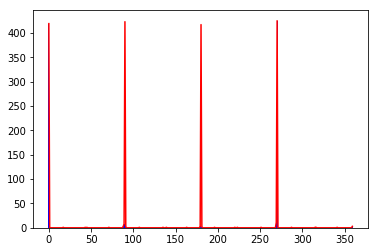

In [22]:
# 0604.py
import numpy as np
import cv2
from   matplotlib import pyplot as plt

src = cv2.imread('./data/rect.jpg', cv2.IMREAD_GRAYSCALE)
##src = cv2.imread('./data/line.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

#1
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)

mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(angle)
print('angle:', minVal, maxVal, minLoc, maxLoc)

#2
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)
cv2.imshow('edge',  edge)

#3
width, height = mag.shape[:2]
angleM = np.full((width,height,3), (255, 255, 255), dtype= np.uint8)
for y in range(height):
    for x in range(width):
        if edge[y, x] != 0: # if mag[y, x] > 100: # edge
            if angle[y, x] ==   0:
                angleM[y, x] =  (0, 0, 255)   # red
            elif angle[y, x] == 90:
                 angleM[y, x] = (0, 255, 0)   # green
            elif angle[y, x] ==180:
                 angleM[y, x] = (255, 0, 0)   # blue                 
            elif angle[y, x] ==270:
                 angleM[y, x] = (0, 255, 255) # yellow
            else:
                angleM[y, x] =  (128, 128, 128) # gray                
cv2.imshow('angleM',  angleM)
cv2.waitKey()    
cv2.destroyAllWindows()

#4
hist = cv2.calcHist(images=[angle], channels=[0], mask=edge,
                    histSize=[360], ranges=[0, 360])

hist = hist.flatten()
##plt.title('hist: binX = np.arange(360)')
plt.plot(hist, color='r')
binX = np.arange(360)
plt.bar(binX, hist, width=1, color='b')
plt.show()


In [34]:
# 0605.py
import cv2
import numpy as np

#1
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0.0)
cv2.imshow('src',  src)
cv2.imshow('blur', blur)

#2
lap  = cv2.Laplacian(src, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap)
print('lap:', minVal, maxVal, minLoc, maxLoc)
dst = cv2.convertScaleAbs(lap)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lap',  lap)
cv2.imshow('dst',  dst)

#3
lap2 = cv2.Laplacian(blur, cv2.CV_32F)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(lap2)
print('lap2:', minVal, maxVal, minLoc, maxLoc)
dst2 = cv2.convertScaleAbs(lap2)
dst2 = cv2.normalize(dst2, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('lap2',  lap2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


lap: -239.0 189.0 (404, 181) (221, 287)
lap2: -35.0 30.0 (180, 435) (367, 449)
